### Install the package

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-75ik985l
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-75ik985l
     |████████████████████████████████| 2.9 MB 7.9 MB/s 
     |████████████████████████████████| 3.3 MB 53.2 MB/s 
     |████████████████████████████████| 948 kB 68.8 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34604 sha256=0f25ce5c50b1cfc9a4d88e31d5e3e2de41c63995de1d3ed4c27c92cc7e277615
  Stored in directory: /tmp/pip-ephem-wheel-cache-uc9nxeix/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: 

### Download the dataset

In [23]:
cd LABis

/content/drive/MyDrive/LABis


In [25]:
ls

dataset/  keras_segmentation_sample_example.ipynb


In [40]:
import cv2
img = cv2.imread("/content/drive/MyDrive/LABis/dataset/train/1.jpg")


In [104]:
# from PIL import Image

# im1 = Image.open(r'/content/drive/MyDrive/LABis/dataset/train/1.jpg')
# im1.save(r'/content/drive/MyDrive/LABis/dataset/new_train/1.png')

In [106]:
# for file in os.listdir('/content/drive/MyDrive/LABis/dataset/train/'):
#   filename = os.fsdecode(file)
#   if filename.endswith(".jpg"):
#     im1 = Image.open(r'/content/drive/MyDrive/LABis/dataset/train/' + filename)
#     im1.save(r'/content/drive/MyDrive/LABis/dataset/new_train/' + filename + '.png')

(256, 512, 3)


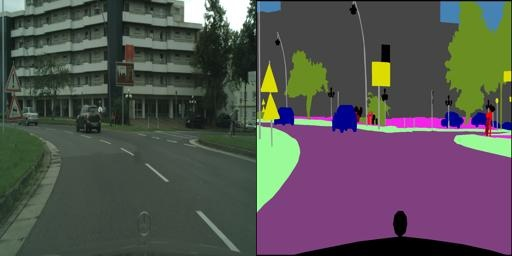

In [42]:
from google.colab.patches import cv2_imshow
print(img.shape)
cv2_imshow(img)

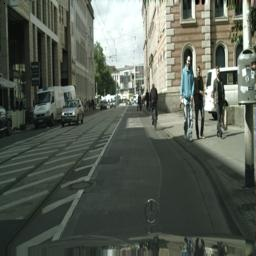

(256, 256, 3)


In [93]:
anno_1 = img[:256, :256]
cv2_imshow(anno_1)
print(anno_1.shape)  # annotation image

In [114]:
import numpy as np
anno_1[3, 4]

array([1, 1, 1], dtype=uint8)

In [102]:
ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[3, 4] = 1

In [103]:
ann_img[3, 4]

array([1, 1, 1], dtype=uint8)

In [55]:
cv2.imwrite('/content/drive/MyDrive/LABis/dataset/train/annotations/anno_1.jpg', anno_1)

True

In [107]:
import os
os.mkdir('/content/drive/MyDrive/LABis/dataset/new_train/annotations')
os.mkdir('/content/drive/MyDrive/LABis/dataset/new_train/images')


In [ ]:
# ! wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip

In [110]:
#cropping annotations

for file in os.listdir('/content/drive/MyDrive/LABis/dataset/new_train/'):
  filename = os.fsdecode(file)
  if filename.endswith(".png"):
    img = cv2.imread('/content/drive/MyDrive/LABis/dataset/new_train/'+filename)
    anno = img[:256, 256:]
    cv2.imwrite('/content/drive/MyDrive/LABis/dataset/new_train/annotations/'+filename, anno)
    

In [111]:
#cropping original images

for file in os.listdir('/content/drive/MyDrive/LABis/dataset/new_train/'):
  filename = os.fsdecode(file)
  if filename.endswith(".png"):
    img = cv2.imread('/content/drive/MyDrive/LABis/dataset/new_train/'+filename)
    original = img[:256, :256]
    cv2.imwrite('/content/drive/MyDrive/LABis/dataset/train/new_images/'+filename, original)

In [153]:
anno_img = cv2.imread('/content/drive/MyDrive/LABis/dataset/train/annotations/1.jpg')

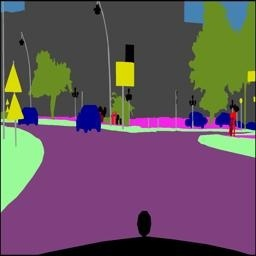

In [156]:
cv2_imshow(anno_img)

In [158]:
for i in anno_img:
  for j in i:
    blue = j[2]
    j[0] = blue
    j[1] = blue
    

In [ ]:
cv2_imshow(anno_img)

In [ ]:
original_img = cv2.imread('/content/drive/MyDrive/LABis/dataset1/images_prepped_train/0001TP_006690.png')
original_img[200]

In [ ]:
cv2_imshow(original_img)

In [125]:
original_img[3] = 1

In [ ]:
original_img[3]

In [ ]:
cv2_imshow(original_img)

### Initialize the model

In [4]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=32 ,  input_height=320, input_width=640  )


58900480/58889256 [==============================] - 2s 0us/step


### Train the model

In [5]:
model.train(
    # train_images =  "/content/drive/MyDrive/LABis/dataset/train/images/",
    # train_annotations = "/content/drive/MyDrive/LABis/dataset/train/annotations/",
    train_images =  "/content/drive/MyDrive/LABis/dataset1/images_prepped_train",
    train_annotations = "/content/drive/MyDrive/LABis/dataset1/annotations_prepped_train",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5  
)

Verifying training dataset


100%|██████████| 367/367 [01:33<00:00,  3.91it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - ETA: 0s - loss: 0.8331 - accuracy: 0.7530
Epoch 1: saving model to /tmp/vgg_unet_1.00001
512/512 [==============================] - 111s 186ms/step - loss: 0.8331 - accuracy: 0.7530
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.4924 - accuracy: 0.8458
Epoch 2: saving model to /tmp/vgg_unet_1.00002
512/512 [==============================] - 96s 188ms/step - loss: 0.4924 - accuracy: 0.8458
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.3894 - accuracy: 0.8763
Epoch 3: saving model to /tmp/vgg_unet_1.00003
512/512 [==============================] - 96s 188ms/step - loss: 0.3894 - accuracy: 0.8763
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.3268 - accuracy: 0.8943
Epoch 4: saving model to /tmp/vgg_unet_1.00004
512/512 [==============================] - 96s 187ms/step - loss: 0.3268 - accuracy: 0.8943
Epoch 5/5
512/512 [=========================

In [6]:
out = model.predict_segmentation(
    inp="/content/drive/MyDrive/LABis/dataset/train/images/1.jpg",
    out_fname="/tmp/out.png"
)

In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

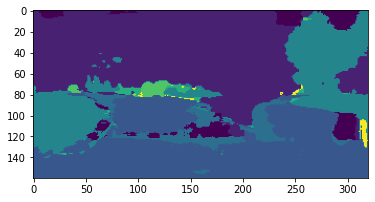

In [8]:
plt.imshow(out)

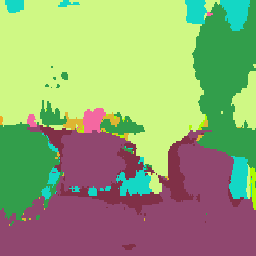

In [9]:
from IPython.display import Image
Image('/tmp/out.png')

In [12]:
o = model.predict_segmentation(
    inp="/content/drive/MyDrive/LABis/dataset/train/images/1.jpg",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

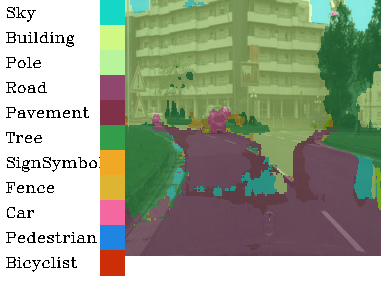

In [13]:
from IPython.display import Image
Image('/tmp/out.png')